**Задание 1**

Попробуем определить тип популяции опоссумов по их размерам. Для работы используйте набор данных “possum.csv”, приложенный к материалам занятия.

**Описание датасета:**

-case: observation number

-site: The site number where the possum was trapped.

-Pop: Population, either Vic (Victoria) or other (New South Wales or Queensland).

-sex: Gender, either m (male) or f (female).

-age: Age.

-hdlngth: Head length, in mm.

-skullw: Skull width, in mm.

-totlngth: Total length, in cm.

-taill: Tail length, in cm.

-footlgth: foot length

-earconch: ear conch length

-eye: distance from medial canthus to lateral canthus of right eye

-chest: chest girth (in cm)

-belly: belly girth (in cm)

**Для выполнения задания:**

Выберите и оставьте числовые признаки, по которым будете определять тип животных, и целевую переменную - Рор

Закодируйте значения по столбцу Рор в 0 и 1 (можно использовать метод LabelEncoder)

Разделите данные на выборку для обучения и тестирования (в соотношении 80 - тренировочная, 20 - тестовая)

Постройте модель LDA

Рассчитайте точность вашей модели на тестовой выборке

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [141]:
possum = pd.read_csv('/content/possum.csv')
possum.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [142]:
df_possum = possum.copy()

In [143]:
df_possum.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [144]:
df_possum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [145]:
#Заполним 1 пропуск в столбце footlgth средним по соответствующей популяции
df_possum['footlgth'] = df_possum['footlgth'].fillna(df_possum.groupby('Pop')['footlgth'].transform('mean'))

In [146]:
df_possum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  104 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [147]:
'''
Удаляем "лишние" столбцы, чтобы оставить только числовые признаки,
по которым будем определять тип животных, и целевую переменную - Рор
'''
df_possum.drop(df_possum.columns[[0, 1, 3, 4 ]], axis=1, inplace=True)

In [148]:
df_possum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pop       104 non-null    object 
 1   hdlngth   104 non-null    float64
 2   skullw    104 non-null    float64
 3   totlngth  104 non-null    float64
 4   taill     104 non-null    float64
 5   footlgth  104 non-null    float64
 6   earconch  104 non-null    float64
 7   eye       104 non-null    float64
 8   chest     104 non-null    float64
 9   belly     104 non-null    float64
dtypes: float64(9), object(1)
memory usage: 8.2+ KB


In [149]:
#Кодируем значения по столбцу Рор в 0 и 1 с помощью метода LabelEncoder (для бинарных категориальных данных)
from sklearn.preprocessing import LabelEncoder

In [150]:
le = LabelEncoder()

df_possum.loc[:, 'Pop_category'] = le.fit_transform(df_possum.loc[:, 'Pop'])

'''
После кодировки (cм.Pop_category):
  Vic - 0
  other - 1
'''

'\nПосле кодировки (cм.Pop_category):\n  Vic - 0\n  other - 1\n'

In [151]:
df_possum

,Pop,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,Pop_category
0,Vic,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,0
1,Vic,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,0
2,Vic,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,0
3,Vic,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,0
4,Vic,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,0
...,...,...,...,...,...,...,...,...,...,...,...
99,other,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0,1
100,other,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0,1
101,other,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0,1
102,other,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0,1


In [152]:
df_possum.drop(('Pop'), axis=1, inplace=True)
df_possum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hdlngth       104 non-null    float64
 1   skullw        104 non-null    float64
 2   totlngth      104 non-null    float64
 3   taill         104 non-null    float64
 4   footlgth      104 non-null    float64
 5   earconch      104 non-null    float64
 6   eye           104 non-null    float64
 7   chest         104 non-null    float64
 8   belly         104 non-null    float64
 9   Pop_category  104 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 8.2 KB


In [153]:
possum_class = df_possum[['Pop_category']]

In [154]:
possum_data = df_possum.iloc[:, 0:9]

In [155]:
#Делим данные на выборку для обучения и тестирования (в соотношении 80 - тренировочная, 20 - тестовая)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(possum_data, possum_class, test_size=0.20, random_state=42)

In [156]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [157]:
lda = LinearDiscriminantAnalysis()

In [158]:
# обучаем данные
lda.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

In [159]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1])

In [160]:
l_X_test_predict = lda.predict(X_test)
l_y_test = y_test.values #получаем двумерный массив, а нужен одномерный

In [163]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([[a for b in l_y_test for a in b], l_X_test_predict]).T
result

,0,1
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
5,1,1
6,1,1
7,1,1
8,0,0
9,0,0


In [164]:
# Рассчитываем точность (accuracy) - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов
from sklearn.metrics import accuracy_score

In [165]:
#наблюдений в категориях примерно одинаковое количество
df_possum['Pop_category'].value_counts()

Pop_category
1    58
0    46
Name: count, dtype: int64

In [166]:
accuracy_score(y_test, lda.predict(X_test))
# точность 100 % на имеющейся выборке

1.0

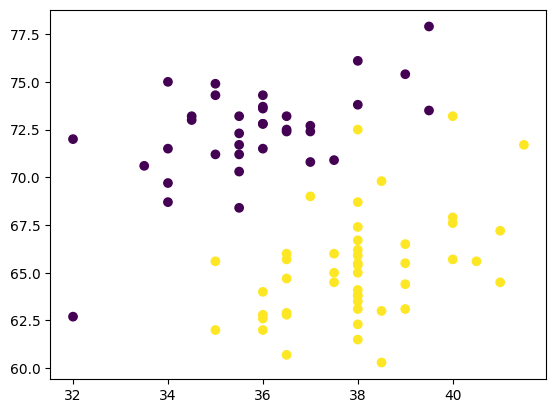

In [167]:
# визуализируем дискриминантную линию, например, по следующим 2 признакам
plt.scatter(x=X_train['taill'], y=X_train['footlgth'], c=y_train['Pop_category'])
plt.show()

**Задание 2**

Теперь кластеризируем страны на основании показателей импорта и экспорта.

Для работы используйте набор данных “Country-data.csv”, приложенный к материалам занятия.

**Описание датасета:**

country: Name of the country

child_mort: Death of children under 5 years of age per 1000 live births

exports: Exports of goods and services per capita. Given as %age of the GDP per capita

health: Total health spending per capita. Given as %age of GDP per capita

imports: Imports of goods and services per capita. Given as %age of the GDP per capita

income: Net income per person

inflation: The measurement of the annual growth rate of the Total GDP

life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same

total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same.

gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population.

**Для выполнения задания:**

Выберите и оставьте только те признаки, по которым будете проводить кластерный анализ.

Подберите оптимальное число кластеров для алгоритма K-means.

Визуализируйте полученную кластеризацию.

Проверьте правильность выбора кластеров с помощью метода локтя.

Примените алгомеративную кластеризацию с учётом рассчитанного методом локтя оптимального количества кластеров.

Визуализируйте результат.

***Желательно, но не обязательно:***

Попробуйте провести кластеризацию с помощью других столбцов в наборе, оцените результаты.

In [168]:
country = pd.read_csv('/content/Country-data.csv')
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [169]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [170]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [171]:
#Оставляем только те признаки, по которым будем проводить кластерный анализ
df_country = country[['exports', 'imports']]
#df_country_exports = country[['exports']]
#df_country_imports = country[['imports']]
df_country

,exports,imports
0,10.0,44.9
1,28.0,48.6
2,38.4,31.4
3,62.3,42.9
4,45.5,58.9
...,...,...
162,46.6,52.7
163,28.5,17.6
164,72.0,80.2
165,30.0,34.4


In [172]:
#Выбираем оптимальное число кластеров для алгоритма K-means
#Пусть будет 4 кластера
from sklearn.cluster import KMeans

In [173]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=4, n_init=10)
# fit_predict обучается на данных и каждому объекту присваивает кластер
df_country['Cluster'] = kmeans.fit_predict(df_country)
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   exports  167 non-null    float64
 1   imports  167 non-null    float64
 2   Cluster  167 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 3.4 KB


<ipython-input-173-15e2cfbd8ee2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['Cluster'] = kmeans.fit_predict(df_country)


<ipython-input-178-7dfae85417d7>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


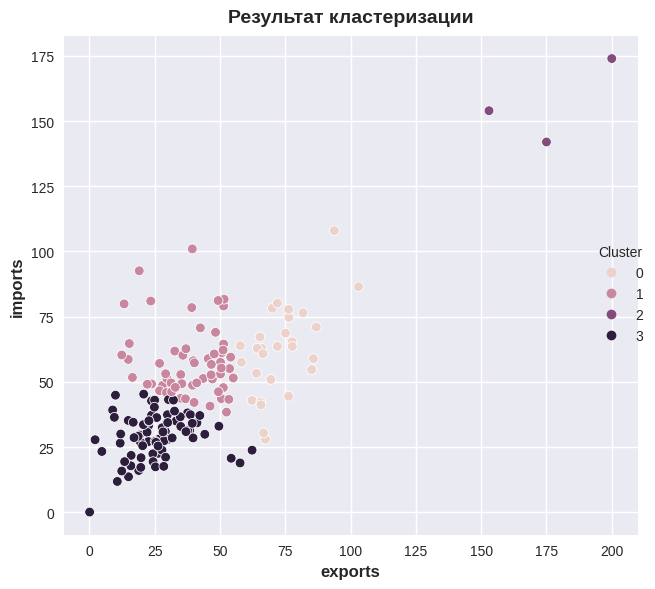

In [178]:
import seaborn as sns

plt.style.use("seaborn")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight='bold', labelsize='large', titleweight='bold', titlesize=14, titlepad=10)
sns.relplot(x="exports", y="imports", hue="Cluster", data=df_country, height=6).set(title='Результат кластеризации')
plt.show()

In [179]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k, n_init=10)
    clusters_kmeans = clf_kmeans.fit_predict(df_country)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

Text(0, 0.5, 'Сумма квадратов внутрикластерных расстояний')

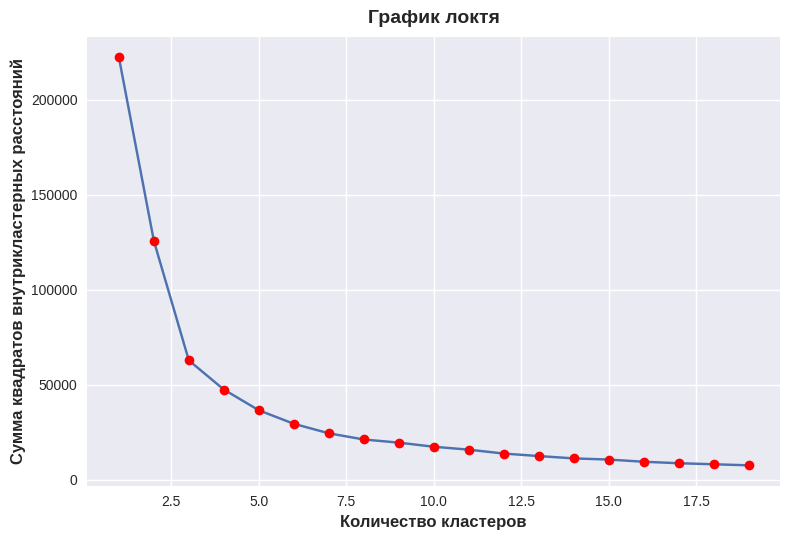

In [181]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
plt.title("График локтя")
plt.xlabel("Количество кластеров")
plt.ylabel("Сумма квадратов внутрикластерных расстояний")

'''
Gосле того как количество кластеров достигает 3,
сумма квадратов внутрикластерных расстояний перестает существенно уменьшаться.
Значит в данном случае 3 кластера будет оптимальным значением.
'''

In [183]:
# Проведем кластеризацию с учетом результатов применения "метода локтя"
from sklearn.cluster import AgglomerativeClustering

'''
Эта функция используется для выполнения иерархической кластеризации набора данных.
В качестве параметров она принимает количество кластеров и метод связывания.
'''

'\nЭта функция используется для выполнения иерархической кластеризации набора данных.\nВ качестве параметров она принимает количество кластеров и метод связывания.\n'

In [184]:
aglo = AgglomerativeClustering(n_clusters=3)
df_country['Cluster_aglo'] = aglo.fit_predict(df_country)
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   exports       167 non-null    float64
 1   imports       167 non-null    float64
 2   Cluster       167 non-null    int32  
 3   Cluster_aglo  167 non-null    int64  
dtypes: float64(2), int32(1), int64(1)
memory usage: 4.7 KB


<ipython-input-184-b77c7a9c3d40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['Cluster_aglo'] = aglo.fit_predict(df_country)


<ipython-input-186-cd231f7d0169>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


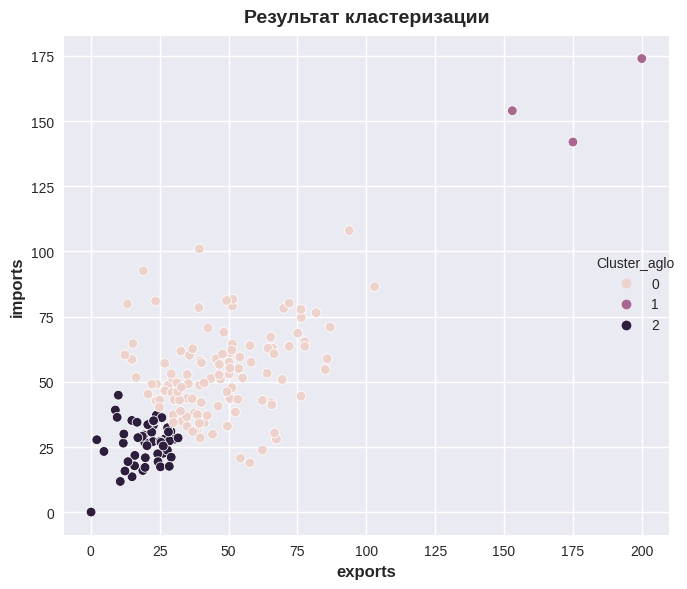

In [186]:
import seaborn as sns

plt.style.use("seaborn")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight='bold', labelsize='large', titleweight='bold', titlesize=14, titlepad=10)
sns.relplot(x="exports", y="imports", hue="Cluster_aglo", data=df_country, height=6).set(title='Результат кластеризации')
plt.show()